# Covid-19:Impact of Air Pollution before and after lockdown  on our Lives [Vehicular and Industrial Pollution to be taken as key point] 

# By-ANUPAM SRIVASTAVA

Types of Air Pollutants

Particulate matter (PM2.5 and PM10) > Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.Source. The following diagram will help to understand the concept more concretely.

Nitrogen Oxides (NO, NO2, NOx) > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2)

Sulphur Dioxide(SO2) > Sulphur dioxide, or SO2 is a colorless gas with a strong odour, similar to a just-struck match. It is formed when fuel containing sulphur, such as coal and oil, is burned, creating air pollution.

Carbon Monoxide(CO) > Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

Benzene, Toluene and Xylene (BTX) > Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry.

Ammonia( NH3) > Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a by product of agriculture and industry.

Ozone(O3) > Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs)

Causes thesepolutants

Vehicles: Transportation majorly emits

Industries: Industries majorly

In [20]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [22]:
df=df_data_0

In [26]:
#To convert all objects to numeric and date time
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['PM2.5'] = pd.to_numeric(df['PM2.5'],errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'],errors='coerce')
df['O3'] = pd.to_numeric(df['O3'],errors='coerce')
df['NO2'] = pd.to_numeric(df['NO2'],errors='coerce')
df['SO2'] = pd.to_numeric(df['SO2'],errors='coerce')
df['CO'] = pd.to_numeric(df['CO'],errors='coerce')


In [27]:
df.isna().sum().sort_values(ascending = False)

Xylene        16807
PM10          10766
NH3            9847
Toluene        7555
Benzene        5287
PM2.5          4289
AQI_Bucket     4282
AQI            4282
NOx            4043
O3             3660
SO2            3544
NO             3233
NO2            3217
CO             1961
Date              0
City              0
dtype: int64

In [28]:
#To drop NaN
df.isna().sum()
df = df.fillna(method = 'ffill')

In [30]:
# TO get an overview of London air quality
print(df['PM2.5'].mean())
print(df['PM10'].mean())
print(df['O3'].mean())
print(df['NO2'].mean())
print(df['SO2'].mean())
print(df['CO'].mean())


70.61198381185469
98.23745583757623
33.79537472825079
27.381139631567123
16.251582058812073
2.4870204813303083


In [31]:
#To make columns containing days, months and years
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)

#To make columns for weekdays and weekends
df['wday'] = df['Date'].dt.day_name()
df['weekday'] = df['wday'].apply(lambda x: 0 if x == 'Saturday' or x == 'Sunday' else 1)

In [33]:
#df = df.reset_index()
df.set_index('Date',inplace = True)

Text(0, 0.5, 'AQI')

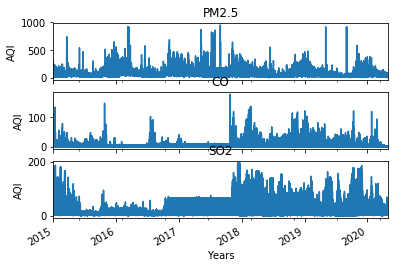

In [35]:
ax = plt.subplot(3,1,1)
df['PM2.5'].plot()
plt.title('PM2.5')
plt.xlabel('Years')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax)
df['CO'].plot()
plt.title('CO')
plt.xlabel('Years')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax)
df['SO2'].plot()
plt.title('SO2')
plt.xlabel('Years')
plt.ylabel('AQI')


In [36]:
df.sort_index(ascending=True, inplace = True)
df2 = df.loc['2016-01':'2020-05']

Text(0, 0.5, 'AQI')

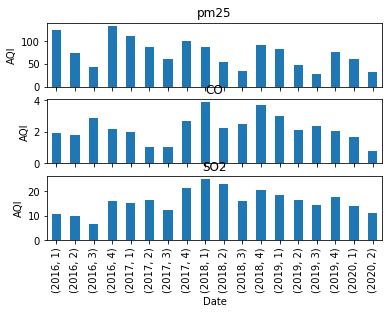

In [37]:
ax1 = plt.subplot(3,1,1)
df2['PM2.5'].groupby(by=[df2.index.year, df2.index.quarter]).mean().plot(kind='bar')
plt.title('pm25')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax1)
df2['CO'].groupby(by=[df2.index.year, df2.index.quarter]).mean().plot(kind='bar')
plt.title('CO')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax1)
df2['SO2'].groupby(by=[df2.index.year, df2.index.quarter]).mean().plot(kind='bar')
plt.title('SO2')
plt.xlabel('Date')
plt.ylabel('AQI')

In [38]:
df3 = df.loc['2019-06-01':'2020-05-01',:]

In [43]:
df3.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day,wday,weekday
Date,,,,,,,,,,,,,,,,,,,,
2019-06-01,Mumbai,12.38,45.97,32.60,14.13,46.54,31.06,1.58,16.05,24.38,0.23,1.44,0.45,81.0,Satisfactory,2019,6,1,Saturday,0
2019-06-01,Brajrajnagar,14.37,46.73,15.26,16.28,12.93,41.43,1.52,7.76,35.05,0.00,0.61,8.81,114.0,Moderate,2019,6,1,Saturday,0
2019-06-01,Gurugram,119.06,238.38,35.69,43.43,46.56,24.33,0.29,12.23,90.99,0.00,0.00,0.00,304.0,Very Poor,2019,6,1,Saturday,0
2019-06-01,Bengaluru,28.95,64.19,9.57,27.09,29.63,13.43,1.04,4.40,52.56,0.81,2.44,8.81,89.0,Satisfactory,2019,6,1,Saturday,0
2019-06-01,Patna,42.86,42.50,3.88,9.42,4.78,5.11,1.26,49.59,75.68,1.30,14.66,4.70,112.0,Moderate,2019,6,1,Saturday,0


Text(0, 0.5, 'AQI')

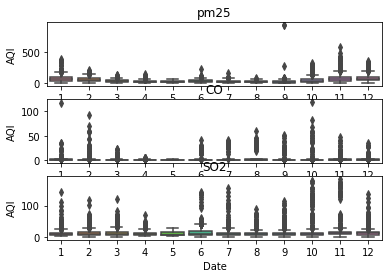

In [45]:
ax1 = plt.subplot(3,1,1)
sbn.boxplot(df3.month, df3['PM2.5'])
plt.title('pm25')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax1)
sbn.boxplot(df3.month, df3['CO'])
plt.title('CO')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax1)
sbn.boxplot(df3.month, df3['SO2'])
plt.title('SO2')
plt.xlabel('Date')
plt.ylabel('AQI')

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0, 0.5, 'AQI')

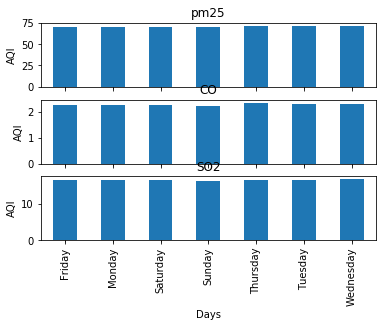

In [70]:
ax1 = plt.subplot(3,1,1)
df2.rename(columns={'PM2.5':'pm25'}, inplace=True)
df2.groupby('wday').pm25.mean().plot(kind='bar')
plt.title('pm25')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.subplot(3,1,2, sharex = ax1)
df2.groupby('wday').CO.mean().plot(kind='bar')
plt.title('CO')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.subplot(3,1,3, sharex = ax1)
df2.groupby('wday').SO2.mean().plot(kind='bar')
plt.title('SO2')
plt.xlabel('Days')
plt.ylabel('AQI')


In [78]:
!conda install -c conda-forge fbprophet

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.1.3      |   py36hef1b27d_0         6.6 MB
    binutils_linux-64-2.33.1   |      h9595d00_17          21 KB  conda-forge
    convertdate-2.2.1          |     pyh9f0ad1d_0          33 KB  conda-forge
    korean_lunar_calendar-0.2.1|     pyh9f0ad1d_0          10 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    gcc_linux-64-7.3.0         |      h553295d_17          21 KB  conda-forge
    gxx_impl_linux-64-7.3.0    |       hdf63c60_1        18.7 MB
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    holidays-0.10.2            |     pyh9f0ad1d_0          59 KB  conda-forge
    openssl-1.1.1g             |       

In [79]:
from fbprophet import Prophet

df2 = df2.reset_index()
data_train = pd.DataFrame({'ds':df2['Date'],
                          'y': df2['CO']})

Importing plotly failed. Interactive plots will not work.


In [80]:
#Fit the data
pro = Prophet(n_changepoints=35, yearly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.03)
pro.fit(data_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [81]:
#Predict
future= pro.make_future_dataframe(periods=1460)
forecast=pro.predict(future)

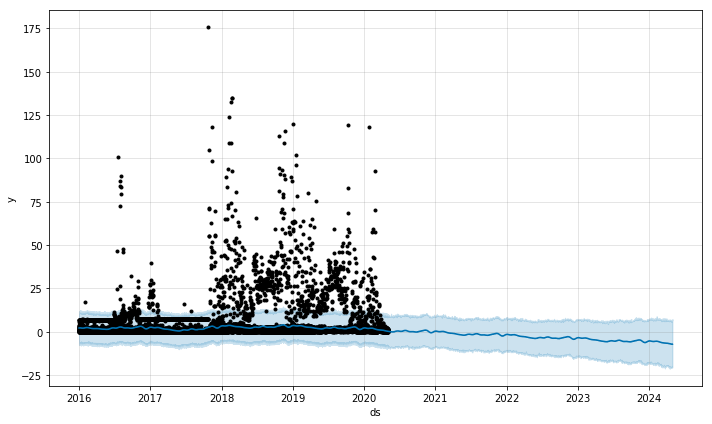

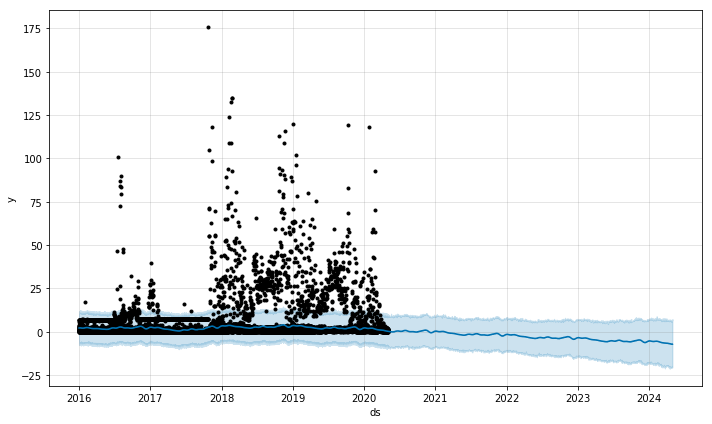

In [82]:
pro.plot(forecast)

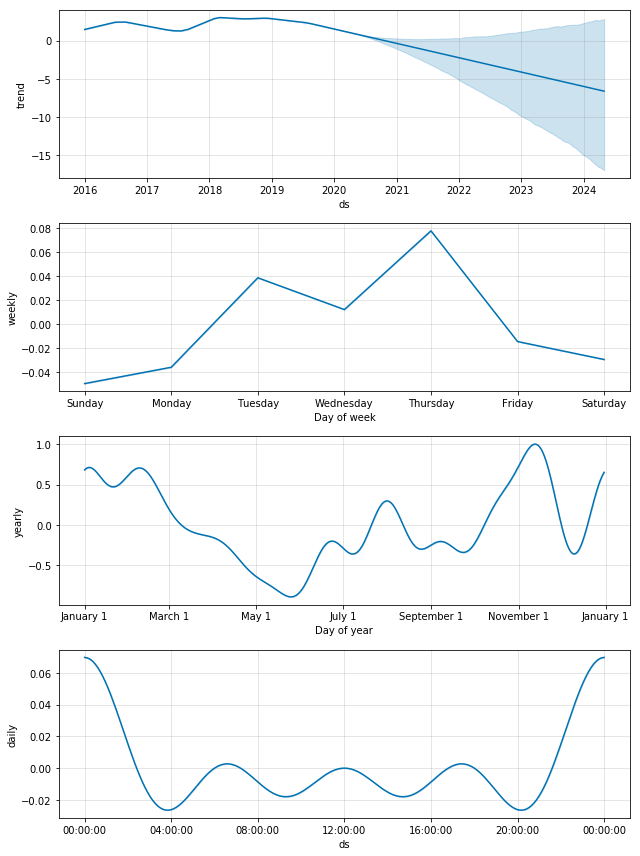

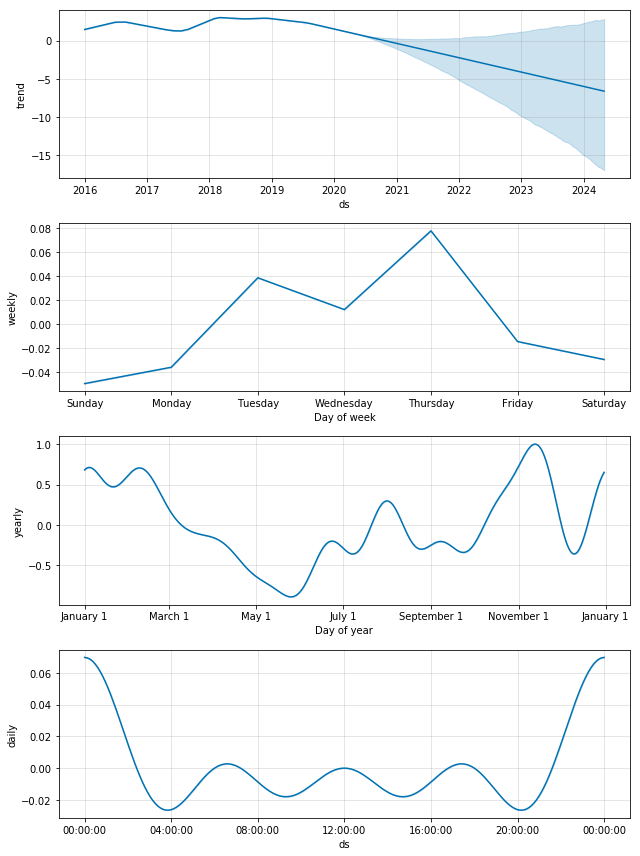

In [83]:
pro.plot_components(forecast)